# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Introducción a FastText</center></span>

<center>Library for efficient text classification and representation learning</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span> 

1. P. Bojanowski*, E. Grave*, A. Joulin, T. Mikolov, [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)
2. A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, [Bag of Tricks for Efficient Text Classification](https://arxiv.org/pdf/1607.01759.pdf)
3. A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, [FastText.zip: Compressing text classification models](https://arxiv.org/pdf/1612.03651.pdf)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Instalación](#Instalación)
* [Modelo No Supervisado](#Modelo-No-Suervisado)
    * [Uso del Modelo (Toy Example)](#Uso-del-Modelo-\(Toy-Example\))
        * [Jugando con los Parámetros](#Jugando-con-los-Parámetros)
        * [Palabras vecinas más cercanas](#Palabras-vecinas-más-cercanas)
    * [Uso del Modelo (Wikipedia)](#Uso-del-Modelo-(Wikipedia))
        * [Preprocesamiento](#Preprocesamiento)
        * [Entrenando el Modelo](#Entrenando-el-Modelo)
        * [Palabras más cercanas](#Palabras-más-cercanas)
        * [Curiosidades](#Curiosidades)
        * [Analogía de Palabras](#Analogía-de-Palabras)
* [Modelo Supervisado](#Modelo-Supervisado)
    * [Uso del Modelo](#Uso-del-Modelo)
    * [Mejorando el Modelo](#Mejorando-el-Modelo)
    * [Autotuning de Parámtros](#Autotuning-de-Parámetros)

## <span style="color:blue">Introducción</span>

El modelo [FastText](https://fasttext.cc/) fue introducido por primera vez por Facebook en 2016 como una extensión y supuestamente una mejora del modelo vainilla de Word2Vec. 

Está basado en el artículo original titulado [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf) de Mikolov et al. que es una lectura excelente para obtener una comprensión profunda de cómo funciona este modelo. En general, FastText es un marco para el aprendizaje de representaciones de palabras y también para realizar una clasificación de texto sólida, rápida y precisa. 

El marco es de código abierto de Facebook en GitHub y afirma tener lo siguiente.

1. Vectores de palabras en inglés de última generación.
2. Vectores de palabras para 157 idiomas entrenados en Wikipedia y rastreo.
3. Modelos para identificación de idiomas y diversas tareas supervisadas.

De acuedo con los autores,  en general, los modelos predictivos como el modelo *Word2Vec* suelen considerar cada palabra como una entidad distinta (por ejemplo, dónde) y generan una incrustación densa para la palabra. 

Sin embargo, esto representa una seria limitación con los idiomas que tienen un vocabulario masivo y muchas palabras raras que pueden no aparecer mucho en diferentes corpus. El modelo Word2Vec normalmente ignora la estructura morfológica de cada palabra y considera una palabra como una sola entidad. 

El modelo **FastText** considera cada palabra como una bolsa de n-gramas de caracteres. Esto también se denomina modelo de subpalabras en el documento.


Se agregan símbolos de límites especiales <y> al principio y al final de las palabras. Esto  permite distinguir prefijos y sufijos de otras secuencias de caracteres. También incluiyen la propia palabra *w* en el conjunto de sus n-gramas, para aprender una representación de cada palabra (además de su carácter n-gramas). 
    
    
Tomando la palabra *where* y n = 3 (tri-gramas) como ejemplo, estará representada por el carácter n-gramas: <wh, whe, her, ere, re> y la secuencia especial <where> que representa la palabra completa . 
    
 Tenga en cuenta que la secuencia, correspondiente a la palabra <her> es diferente del trigrama ella de la palabra where.
    
En la práctica, el artículo recomienda extraer todos los n-gramas para $3\le n \le 6$ Este es un enfoque muy simple, y se podrían considerar diferentes conjuntos de n-gramas, por ejemplo, tomando todos los prefijos y sufijos. 
    
Normalmente asociamos una representación vectorial (incrustación) a cada n-grama de una palabra. Por tanto, podemos representar una palabra mediante la suma de las representaciones vectoriales de sus n-gramas o el promedio de la incrustación de estos n-gramas. 
    
Según los autores, debido a este efecto de aprovechar los n-gramas de palabras individuales basadas en sus caracteres, existe una mayor probabilidad de que las palabras raras obtengan una buena representación, ya que sus n-gramas basados en caracteres deben aparecer en otras palabras del corpus.
    
Vamos a la práctica.

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Instalación</span>

`$ git clone https://github.com/facebookresearch/fastText.git`

`$ cd fastText`

`$ sudo pip install .`

`$ # or :`

`$ sudo python setup.py install`

Si todo va bien, el siguiente comando debería funcionar:

In [1]:
import fasttext as ft

In [2]:
help(ft.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might want to consult standard preprocessi

In [3]:
dir(ft)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'cbow',
 'division',
 'load_model',
 'print_function',
 'skipgram',
 'supervised',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

Como podemos observar, contamos con dos modelos: **unsupervised** y **supervised**.

Veamos cómo funcionan.

[[Volver al inicio]](#Contenido)

## Modelo No Supervisado

Para este ejemplo de juguete, usemos los poemas de Daniel.

## Uso del Modelo (Toy Example)

In [4]:
model = ft.train_unsupervised('Poemas_Todo.txt')

Read 0M words
Number of words:  184
Number of labels: 0
Progress: 100.0% words/sec/thread:   65429 lr:  0.000000 avg.loss:  4.118722 ETA:   0h 0m 0s


Veamos qué tiene el modelo por dentro:

In [5]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'bucket',
 'dim',
 'epoch',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'label',
 'labels',
 'loss',
 'lr',
 'lrUpdateRate',
 'maxn',
 'minCount',
 'minCountLabel',
 'minn',
 'neg',
 'predict',
 'pretrainedVectors',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 't',
 'test',
 'test_la

In [6]:
print(model.words)

['</s>', 'y', 'de', 'que', 'la', 'el', 'en', 'las', 'con', 'los', 'por', 'un', 'se', 'tu', 'a', 'del', 'una', 'no', 'mi', 'es', 'te', 'me', 'como', 'su', 'mis', 'para', 'sin', 'tus', 'entre', 'porque', 'lo', 'más', 'sus', 'nos', 'noche', 'ese', 'cada', 'pero', 'al', 'hasta', 'todo', 'manos', 'cielo', 'Y', 'día', 'cuerpo', 'ojos', 'sueño', 'ni', 'son', 'cuando', 'ser', 'qué', 'Me', 'palabras', 'le', 'labios', 'Te', 'ya', 'o', 'cosas', 'mundo', 'si', 'mujer', 'sobre', 'cuerpos', 'vida', 'eres', 'luna', 'esa', 'este', 'toda', 'piel,', 'En', 'sólo', 'jamás', 'donde', 'amor', 'sueños', 'va', 'hay', 'Ese', 'siempre', 'e', 'Es', 'frío', 'La', 'puedo', 'tan', 'deseo', 'lleno', 'rostro', 'visto', 'he', 'dos', 'sueños,', 'quien', 'ha', 'noche,', 'imagen', 'Yo', 'nuestra', 'gusta', 'contra', 'He', 'nubes', 'pasión', 'mar', 'aire', 'esperar', 'volando', 'misma', 'dulce', 'vez', 'lejos', 'tiempo', 'brisa', 'aún', 'El', 'dónde', 'abismo', 'veces', 'música', 'ésta', 'piel', 'hacia', 'letras', 'ante',

In [7]:
len(model.words)

184

In [8]:
soy_vector = model.get_word_vector("soy")
soy_vector

array([ 3.70543962e-03,  8.37066956e-03, -5.50515437e-03, -1.24249607e-04,
        2.42939778e-03,  1.55407120e-03, -1.08765345e-03, -3.81100061e-03,
        1.01086097e-02,  5.31225419e-03, -4.43909131e-03,  2.28441597e-04,
       -7.25109538e-04,  4.66341013e-03, -3.68466972e-05, -1.87909952e-03,
        9.05735709e-04,  3.71828605e-03, -2.06560642e-03, -6.25834754e-03,
       -1.03769416e-03,  4.45846061e-04,  4.55524353e-03, -1.50300446e-03,
        3.41521646e-03, -3.51131149e-03,  5.83332847e-04, -8.67802883e-04,
       -2.16151448e-03,  2.36369530e-03, -9.19947214e-03, -2.07637064e-03,
        8.52814002e-04, -2.41027959e-03, -1.15303211e-02, -7.64431199e-03,
       -1.18330074e-03,  1.62962254e-03, -4.67444956e-03, -9.65831615e-03,
        1.58754108e-03,  7.66551169e-03,  2.37135566e-03,  4.65557165e-03,
       -4.28355881e-04, -5.12372050e-03,  6.79135206e-04, -1.44966587e-03,
       -3.05020204e-03,  4.13821964e-03, -5.80588216e-03,  5.08889370e-03,
       -1.52134825e-03,  

In [9]:
soy_vector.shape

(100,)

In [10]:
model.save_model("Poemas.bin")

In [11]:
model = ft.load_model("Poemas.bin")

Por defecto, el modelo entrenado es skipgram, pero también tenemos disponible la arquitectura cbow.

![ft](https://fasttext.cc/img/cbo_vs_skipgram.png)

Fuente: [FastText, Word Representations](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

In [12]:
# model_cbow = fasttext.train_unsupervised('../Datos/Poemas_Todo.txt', "cbow")

En palabras de Facebook,

***In practice, we observe that skipgram models works better with subword information than cbow.***

[[Volver al inicio]](#Contenido)

### Jugando con los Parámetros 

Dependiendo del problema, puede ser que los parámetros por defecto no sean los más adecuados.

Para conocer todos los parámetros de FastText, podemos ingresar [aquí](https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters)

Por ejemplo, modifiquemos los parámetros **mínimos** y **máximos** de lo n-gramas permitidos, la **dimensión** del vector, las **epochs** y la frecuencia mínima de palabras:

In [13]:
import fasttext as ft

In [14]:
model = ft.train_unsupervised('Poemas_Todo.txt', minCount=2, minn=2, maxn=5, dim=300)

Read 0M words
Number of words:  846
Number of labels: 0
Progress: 100.0% words/sec/thread:   32835 lr:  0.000000 avg.loss:  3.358345 ETA:   0h 0m 0s


Verifiquemos la longitud de las palabras:

In [15]:
model.get_word_vector("soy").shape

(300,)

[[Volver al inicio]](#Contenido)

### Palabras vecinas más cercanas

Como cada palabra en el corpus tiene un vector asociado, podemos obtener palabras cercanas usando la similaridad de coseno:

In [16]:
 model.get_nearest_neighbors('sueño',k=20)

[(0.9999974966049194, 'sueños,'),
 (0.9999974966049194, 'sueño,'),
 (0.9999974966049194, 'sueños'),
 (0.9999962449073792, 'pequeño'),
 (0.9999961853027344, 'suelo'),
 (0.9999958276748657, 'pensamiento'),
 (0.9999958276748657, 'suelo,'),
 (0.9999954700469971, 'pensamiento,'),
 (0.9999954700469971, 'esta'),
 (0.9999953508377075, 'colores,'),
 (0.9999953508377075, 'suerte'),
 (0.9999953508377075, 'siento'),
 (0.9999952912330627, 'contaminadas'),
 (0.9999952912330627, 'aliento'),
 (0.9999951720237732, 'entonces,'),
 (0.9999951720237732, 'pequeñas'),
 (0.9999951720237732, 'pensamientos'),
 (0.9999951720237732, 'queriendo'),
 (0.9999951124191284, 'pequeños'),
 (0.9999951124191284, 'aquello')]

### Visualización de Embeddings de Palabras

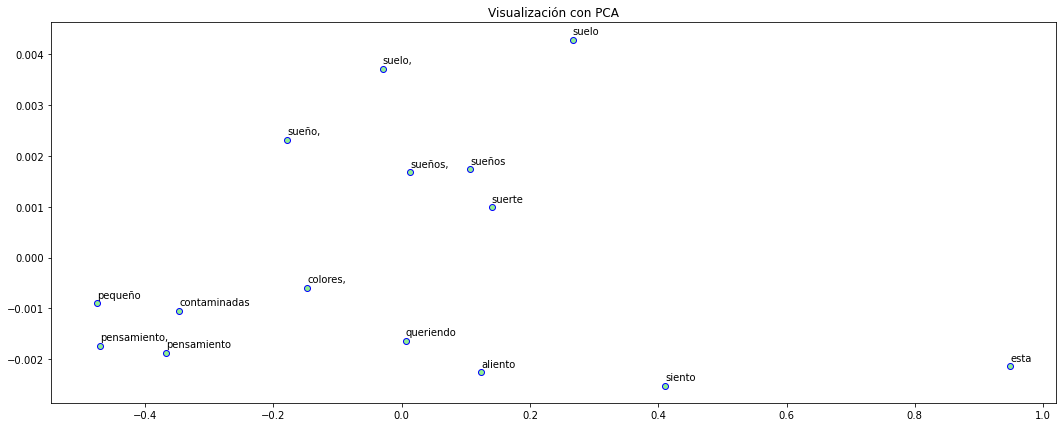

In [69]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

p = model.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con PCA')

eps = 0.5e12*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

/Users/moury/miniforge3/envs/impertinencias/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


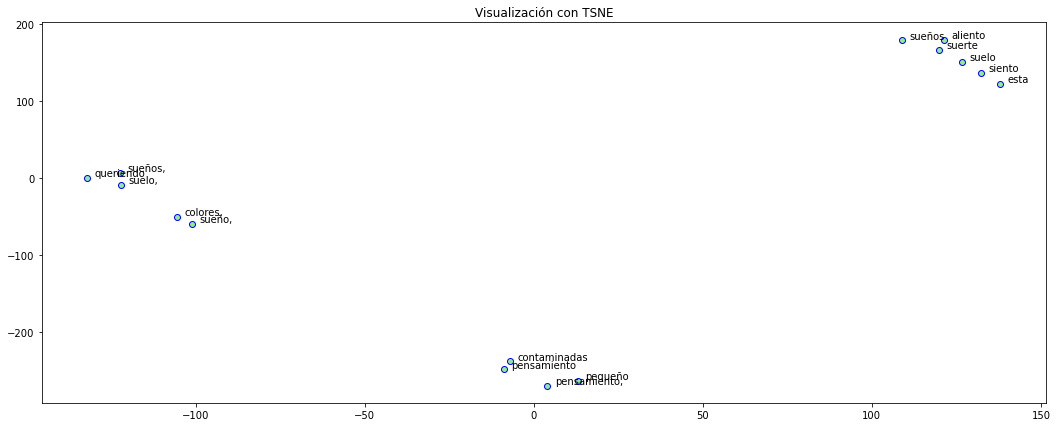

In [67]:
%matplotlib tk
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

p = model.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### Visualización de Embeddings de Textos

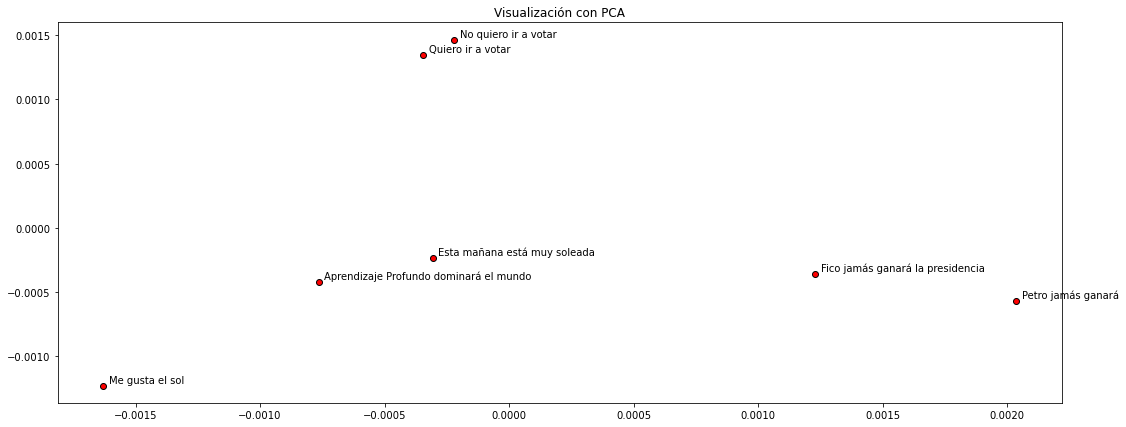

In [70]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
    

/Users/moury/miniforge3/envs/impertinencias/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


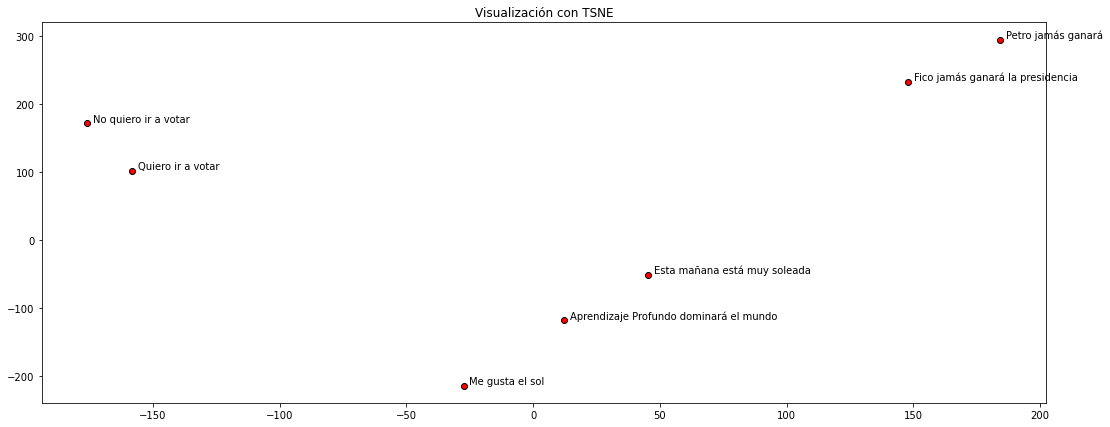

In [73]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model.get_sentence_vector(t) for t in textos])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='r', edgecolors='k')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

[[Volver al inicio]](#Contenido)

### Usando Modelos Pre-entrados en Español

In [24]:
model_es = ft.load_model('cc.es.300.bin')

In [25]:
# TAKES TIME! DONT RUN IT IN CLASS
model_es.get_nearest_neighbors('sueño',k=15)

[(0.7171677947044373, 'sueños'),
 (0.7092401385307312, 'sueno'),
 (0.6959096789360046, 'sueño.El'),
 (0.6859577298164368, 'sueño.Y'),
 (0.6825155019760132, 'Sueño'),
 (0.6815561652183533, 'sueño.La'),
 (0.6758346557617188, 'sueño.Pero'),
 (0.6724787950515747, 'sueño.A'),
 (0.6669973134994507, 'sueño.Es'),
 (0.6650846600532532, 'sueñoUn'),
 (0.6573185920715332, 'elsueño'),
 (0.6529608964920044, 'sueño.Un'),
 (0.6516568064689636, 'sueñ'),
 (0.6469879746437073, 'sueño.En'),
 (0.6467815637588501, 'sueñoEn')]

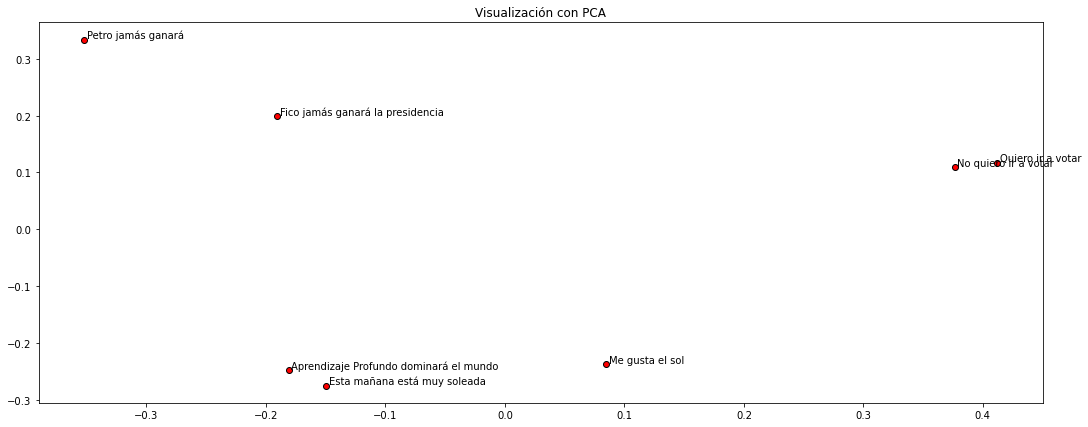

In [74]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model_es.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e13*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### Re-entrenando Embedding 

### <span style="color:red">¡NO CORRER DE MANERA LOCAL A MENOS QUE TENGA SUFICIENTE MEMORIA RAM!</span>

In [ ]:
#model_transfer_learning_es = ft.train_unsupervised('Poemas_Todo.txt', minCount=2, minn=2, maxn=5, dim=300,pretrainedVectors='cc.es.300.vec')

### Bonus: Transformers 

In [35]:
from sentence_transformers import SentenceTransformer

model_tr_es = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')

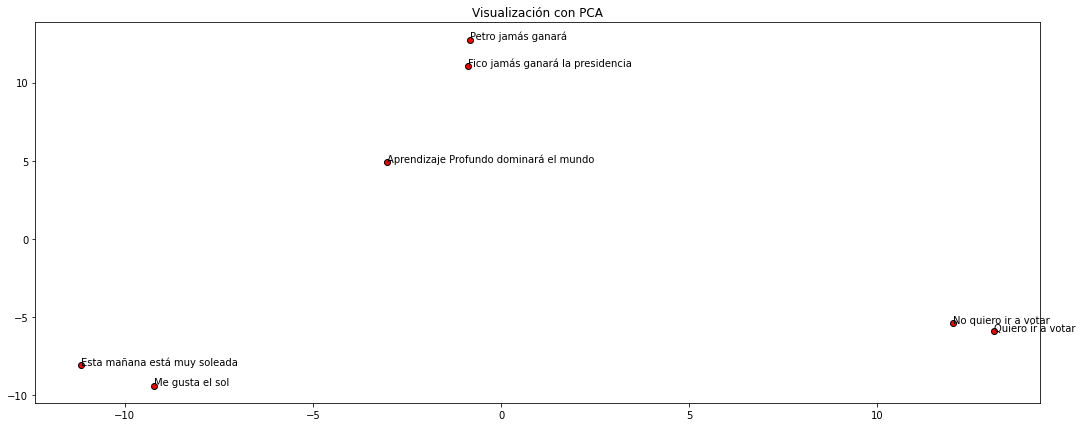

In [76]:
textos = ['Esta mañana está muy soleada',
         'Petro jamás ganará',
         'Fico jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

sent_vec = model_tr_es.encode(textos)

pca = PCA(n_components=2)
P = pca.fit_transform(sent_vec)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')
eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

## Uso del Modelo (Wikipedia) 

Primero que todo, obtengamos los datos que necesitamos:

In [5]:
# Corpus Completo
#!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 -o ../Datos/enwiki-latest-pages-articles.xml.bz2
# Corpus 1 billón de bytes (1 Giga)
!wget -c http://mattmahoney.net/dc/enwik9.zip -P ../Datos

--2021-11-19 16:13:05--  http://mattmahoney.net/dc/enwik9.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.24
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 322592222 (308M), 294168810 (281M) remaining [application/zip]
Saving to: ‘../Datos/enwik9.zip’

enwik9.zip          100%[+==================>] 307,65M   566KB/s    in 8m 28s  

2021-11-19 16:21:34 (565 KB/s) - ‘../Datos/enwik9.zip’ saved [322592222/322592222]



Como el formato viene en `.zip`, descomprimamos el contenido

In [7]:
!unzip ../Datos/enwik9.zip -d ../Datos

Archive:  ../Datos/enwik9.zip
  inflating: ../Datos/enwik9         


Miremos algo de información:

In [12]:
!head -c 2000 ../Datos/enwik9

<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.3/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.3/ http://www.mediawiki.org/xml/export-0.3.xsd" version="0.3" xml:lang="en">
  <siteinfo>
    <sitename>Wikipedia</sitename>
    <base>http://en.wikipedia.org/wiki/Main_Page</base>
    <generator>MediaWiki 1.6alpha</generator>
    <case>first-letter</case>
      <namespaces>
      <namespace key="-2">Media</namespace>
      <namespace key="-1">Special</namespace>
      <namespace key="0" />
      <namespace key="1">Talk</namespace>
      <namespace key="2">User</namespace>
      <namespace key="3">User talk</namespace>
      <namespace key="4">Wikipedia</namespace>
      <namespace key="5">Wikipedia talk</namespace>
      <namespace key="6">Image</namespace>
      <namespace key="7">Image talk</namespace>
      <namespace key="8">MediaWiki</namespace>
      <namespace key="9">MediaWiki talk</namespace>
      <namespa

Como un archivo raw de Wikipedia contiene toneladas de datos HTML/XML, preprocesaremos la información con el archivo wikifil.pl, escrito por Matt Mahoney y puede ser encontrado el script original en su paǵina personal [aquí](http://mattmahoney.net/).

El script asociado funciona usando el lenguaje de programación PERL, y se ejecuta a continuación:

### Preprocesamiento

In [13]:
!perl ../Datos/wikifil.pl ../Datos/enwik9 > ../Datos/fil9

Veamos algo del resultado obtenido:

In [2]:
!head -c 2000 ../Datos/fil9

 anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate the elimination of authoritarian institutions particularly the state the word anarchy as most anarchists use it does not imply chaos nihilism or anomie but rather a harmonious anti authoritarian society in place of what are regarded as authoritarian political structures and coercive economic instituti

[[Volver al inicio]](#Contenido)

### Entrenando del Modelo

In [ ]:
model = ft.train_unsupervised('../Datos/fil9')

Read 124M words3M words
Number of words:  218316
Number of labels: 0
Progress:  31.5% words/sec/thread:   45623 lr:  0.034237 avg.loss:  0.601562 ETA:   0h51m49sm 8s lr:  0.049049 avg.loss:  1.546121 ETA:   1h16m37s 1.495166 ETA:   1h17m48s  4.0% words/sec/thread:   42449 lr:  0.047977 avg.loss:  1.451111 ETA:   1h18m 2s words/sec/thread:   42355 lr:  0.046572 avg.loss:  1.341497 ETA:   1h15m55sh16m 3s% words/sec/thread:   44134 lr:  0.045075 avg.loss:  1.130582 ETA:   1h10m31s 16.0% words/sec/thread:   45933 lr:  0.041981 avg.loss:  0.870252 ETA:   1h 3m 6s 17.8% words/sec/thread:   45410 lr:  0.041112 avg.loss:  0.814919 ETA:   1h 2m31sh 2m25s  44928 lr:  0.038916 avg.loss:  0.719204 ETA:   0h59m48s57m30s 25.7% words/sec/thread:   45038 lr:  0.037161 avg.loss:  0.668852 ETA:   0h56m58s  0h54m58s 0.035755 avg.loss:  0.635238 ETA:   0h54m46s 30.9% words/sec/thread:   45385 lr:  0.034537 avg.loss:  0.608555 ETA:   0h52m32s

[[Volver al inicio]](#Contenido)

### Palabras más cercanas

In [ ]:
model.get_nearest_neighbors('asparagus')

[[Volver al inicio]](#Contenido)

###  Curiosidades

In [ ]:
model.get_nearest_neighbors('pidgey')

[[Volver al inicio]](#Contenido)

###  Analogía de Palabras

In [ ]:
model.get_analogies("berlin", "germany", "france")

[[Volver al inicio]](#Contenido)

## Modelo Supervisado

Para este ejemplo, usaremos el conjunto de datos de preguntas de [the cooking section of Stackexchange](https://cooking.stackexchange.com/):

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz

In [ ]:
!head cooking.stackexchange.txt

In [ ]:
!wc cooking.stackexchange.txt

In [ ]:
!head -n 12404 cooking.stackexchange.txt > cooking.train

In [ ]:
!tail -n 3000 cooking.stackexchange.txt > cooking.valid

[[Volver al inicio]](#Contenido)

### Uso del Modelo

In [ ]:
import fasttext as ft

In [ ]:
model = fasttext.train_supervised(input="cooking.train")

In [ ]:
model.predict("Which baking dish is best to bake a banana bread ?")

In [ ]:
model.test("cooking.valid")

[[Volver al inicio]](#Contenido)

### Mejorando el Modelo 

In [ ]:
!cat cooking.stackexchange.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > cooking.preprocessed.txt
!head -n 12404 cooking.preprocessed.txt > cooking.train
!tail -n 3000 cooking.preprocessed.txt > cooking.valid

In [ ]:
model = fasttext.train_supervised(input="cooking.train")

In [ ]:
model.test("cooking.valid")

[[Volver al inicio]](#Contenido)

###  Autotuning de Parámetros

In [ ]:
model = fasttext.train_supervised(input='cooking.train', autotuneValidationFile='cooking.valid')

In [ ]:
model.test("cooking.valid")

[[Volver al inicio]](#Contenido)